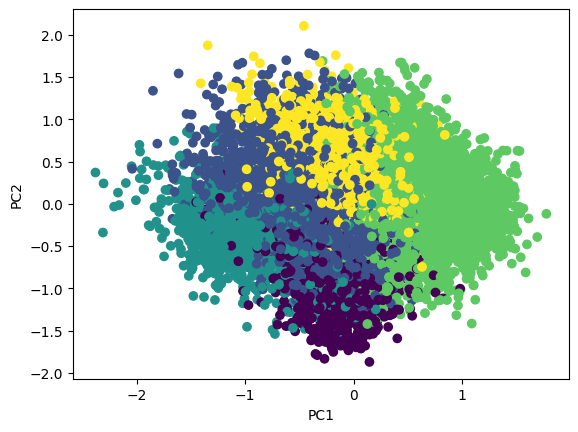

In [6]:
from sklearn.decomposition import PCA
import pandas as pd
import pickle
import matplotlib.pyplot as plt
# Load the embeddings
with open('embeddings.pkl', 'rb') as file:
    embeddings = pickle.load(file)

# Apply PCA to reduce to, e.g., 10 dimensions
pca = PCA(n_components=10)  # Adjust the number of dimensions as needed
embeddings_reduced = pca.fit_transform(embeddings)

# Optionally perform clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(embeddings_reduced)

# Create a DataFrame and add cluster labels
embeddings_df = pd.DataFrame(embeddings_reduced, columns=[f'PC{i+1}' for i in range(embeddings_reduced.shape[1])])
embeddings_df['Cluster'] = labels

# Save to CSV
embeddings_df.to_csv('embeddings_with_clusters_reduced.csv', index=False)

# Plot the first two principal components
plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [13]:
from sklearn.decomposition import PCA
import pandas as pd
import pickle
import json
from sklearn.cluster import KMeans

# Load embeddings from the pickle file
with open('embeddings.pkl', 'rb') as file:
    embeddings = pickle.load(file)

# Load article titles from the JSON file with utf-8 encoding
with open('articles.json', 'r', encoding='utf-8') as file:
    data = json.load(file)  # Load the entire JSON data
    # Extract titles from the list of articles
    titles = [article['title'] for article in data]  # data is already a list of dictionaries

# Ensure titles matches the embeddings in length
if len(titles) != len(embeddings):
    raise ValueError("The number of titles does not match the number of embeddings.")

# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)  # Reduce to 10 dimensions or any other desired number
embeddings_reduced = pca.fit_transform(embeddings)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(embeddings_reduced)

# Create a DataFrame with reduced embeddings, cluster labels, and titles
embeddings_df = pd.DataFrame(embeddings_reduced, columns=[f'PC{i+1}' for i in range(embeddings_reduced.shape[1])])
embeddings_df['Cluster'] = labels
embeddings_df['Title'] = titles  # Add the titles as a new column

# Save the reduced embeddings, clusters, and titles to CSV
embeddings_df.to_csv('embeddings_with_clusters_and_titles.csv', index=False)
